<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF280 - Estadística Computacional </h1>
    <h2> Generación de Variables Aleatorias </h2>
    <h2> Version: 0.01 </h2>
    <h2> Ay. Nicolás Armijo Calquín </h2> 
    <h2> Ay. Eva Wang Liu </h2>
</center>

<div id='toc'>

## Tabla de Contenidos

* [Introducción](#intro)
* [Librerías de Python](#python)
    * [NumPy Random](#numpy_random)
    * [Scipy Stats](#scipy_stats)
* [Método de la transformada inversa](#metodo_transformada_inversa)
    * [Ejemplo](#metodo_transformada_inversa_ejemplo)
* [Referencias](#referencias)

<div id='intro'>

## Introducción

Cuando intentamos modelar situaciones de la vida real, nos encontramos con el desafío de que estas no siguen una distribución uniforme, sino que se ajustan a distribuciones más complejas y específicas. Las variables aleatorias suelen seguir distribuciones de probabilidad que reflejan fenómenos específicos, por lo que hacer uso de ellas permite que nuestros modelos se acerquen más a la realidad.

Para simular variables aleatorias, se deben generar números uniformes y transformarlos a valores de una distribución de probabilidad mediante una función específica. Aunque en la actualidad múltiples módulos en lenguajes de programación permiten la realización de este proceso rápidamente, también existen varios procedimientos para lograr este procedimiento manualmente, tales como el método de la transformada inversa.

En el presente Jupyter Notebook...

Antes de partir, importaremos las bibliotecas que complementarán nuestro trabajo:

In [39]:
# Importamos bibliotecas complementarias
import pandas as pd
import matplotlib.pyplot as plt

<div id='python'>

## Librerías de Python

Las librerías NumPy y Scipy de Python contienen los submódulos Random y Stats, respectivamente, que permiten la simulación de variables aleatorias de forma rápida y eficiente.

<div id='numpy_random'>

### NumPy Random

Antes de partir, debemos importar la librería NumPy.

In [2]:
# Importamos NumPy - Debemos instalarlo con pip install numpy
import numpy as np

Random es un submódulo de NumPy que se dedica a la generación de números y variables aleatorias. En particular, para la generación de variables aleatorias proporciona varias funciones dependiendo de la distribución de probabilidad que estas siguen. Algunas de estas funciones son:

* `np.random.binomial`: genera muestras de una **distribución binomial**.

* `np.random.poisson`: genera muestras de una **distribución de Poisson**.

* `np.random.uniform`: genera muestras de una **distribución uniforme**.

* `np.random.normal`: genera muestras de una **distribución normal (gaussiana)**.

* `np.random.exponential`: genera muestras de una **distribución exponencial**

* `np.random.multivariate_normal`: genera muestras de una **distribución normal multivariada**.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://numpy.org/doc/stable/reference/random/index.html

<div id='scipy_stats'>

### Scipy Stats

Antes de partir, debemos importar la librería Scipy.

In [3]:
# Importamos Scipy - Debemos instalarlo con pip install scipy
import scipy

Stats es un submódulo de Scipy que, al igual que Random, se dedica a la generación de variables aleatorias. No obstante, ofrece una funcionalidad estadística más avanzada.

La función `rvs` genera muestras aleatorias y se puede aplicar a distintas distribuciones de probabilidad, tales como:

* `scipy.stats.binom.rvs`: genera muestras de una **distribución binomial**.

* `scipy.stats.norm.rvs`: genera muestras de una **distribución normal (gaussiana)**.

* `scipy.stats.expon.rvs`: genera muestras de una **distribución exponencial**.

Por otro lado, Stats también ofrece las funciones `pdf` y `cdf`, que calculan las funciones de densidad y de distribución acumulada cuando son aplicadas a una distribución de probabilidad.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://docs.scipy.org/doc/scipy/reference/stats.html

<div id='metodo_transformada_inversa'>

## Método de la transformada inversa

El método de la transformada inversa es una técnica para generar variables aleatorias a partir de la transformación de números uniformes a valores de una distribución de probabilidad mediante una función específica. Este método aprovecha la propiedad de las funciones de probabilidad acumulada, en las cuales su recorrido siempre se encontrará en el intervalo cerrado $[0,1]$.

Supongamos que queremos generar una variable aleatoria $X$ la cual tiene una función de probabilidad que sigue:

$$P(X=x_j)=\left\{\begin{array}{lr} x_0    & p_0 \\ \\
                                    x_1    & p_1 \\ \\
                                    x_2    & p_2 \\ \\
                                    \vdots &     \\ \\
                                    x_n    & p_n \end{array}\right.$$

Nuestra misión es generar eventos aleatorios $X = x_j$ tal que cumpla con la función de probabilidad. Para esto nos apoyaremos en 
los números aleatorios y en la función de distribución de $X$ la cual denotaremos como $F_x$.

Generaremos un número aleatorio $U$ que siga una distribución uniforme $(0,1)$, es decir, $U \sim U(0,1)$. Luego de esto, 
aprovecharemos la siguiente propiedad: dados $a,b$ que cumplan $0<a<b<1$, se tiene que $P\{a\leq U<b\}=b-a$. Con esta propiedad 
en mente, contruimos la función de probabilidad anterior de la siguiente forma:

$$P\{X=x_i\}=\left\{\sum_{i=0}^{j-1}p_i\leq U<\sum_{i=0}^{j}p_i\right\}=p_j$$

Entonces, podemos generar $X$ siguiendo la siguiente regla:

$$X=\left\{\begin{array}{lcc} x_0    & si & U   \leq p_0                                \\ \\
                              x_1    & si & p_0 \leq U<p_0+p_1                          \\ \\
                              \vdots &    &                                             \\ \\
                              x_j    & si & \sum_{i=0}^{j-1}p_i\leq U<\sum_{i=0}^{j}p_i \\
                              \vdots &    &                                             \end{array}\right.$$

Por último, si tenemos los $x_i$ ordenados tal que, $x_1<x_2<\cdots$, tendremos que $X$ será $x_j$ si $F_X(x_{j-1})\leq U<F_X(x_j)
$.

En resumen, este método consiste en los siguientes 3 pasos:

1. Generar un número aleatorio $u$ (computacionalmente son pseudo-aleatorios), tal que siga una distribución uniforme $(0,1)$, es decir $u\sim U(0,1)$.

2. Hallar la inversa de la función de probabilidad acumulada $F^{-1}_X(x)$.

3. Finalmente, calcular $X=F^{-1}_X(u)$. Así habremos generado $X=x$ que siga la distribución de $F_X$.

A continuación, se presentará un ejemplo introductorio al método de la transformada inversa.

<div id='metodo_transformada_inversa_ejemplo'>

### Ejemplo

Queremos simular una variable aleatoria $X$ tal que $p_1 = 0.10$, $p_2 = 0.25$, $p_3 = 0.60$, $p_4 = 0.05$

In [25]:
# Creamos un DataFrame de Pandas para llevar la cuenta de ocurrencia de cada variable x_i
# Se crean 4 DataFrames para llevar el registro de 4 simulaciones distintas
X_1 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_2 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_3 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])
X_4 = pd.DataFrame({'count': [0,0,0,0]}, index=['x_1','x_2','x_3','x_4'])

X_1

,count
x_1,0
x_2,0
x_3,0
x_4,0


In [26]:
# Método de la transformada inversa
def generator(df):
    # Utilizamos NumPy para generar un número pseudoaleatorio de distribución uniforme(0,1)
    U = np.random.random()
    # Dependiendo del intervalo de U, generamos x_i utilizando F_X
    if U < 0.1:
        df['count']['x_1'] += 1
    elif U < 0.35:
        df['count']['x_2'] += 1
    elif U < 0.95:
        df['count']['x_3'] += 1
    else:
        df['count']['x_4'] += 1
    return

In [27]:
## Definimos la función sim para simular nuestro algoritmo n veces y así analizar la distribución de las variables generadas
def sim(n, X):
    for i in range(n):
        generator(X)
    return

A continuación, vamos a realizar distintas simulaciones para ver cómo se comporta nuestro generador de variables aleatorias, y si 
este en realidad genera las variables con la probabilidad exigida.

In [35]:
# Simulamos 100 veces y calculamos la probabilidad de cada x_i
sim(100, X_1)
X_1 /= 100

X_1

,count
x_1,0.170311
x_2,0.252025
x_3,0.567161
x_4,0.020604


In [36]:
# Simulamos 1000 veces y calculamos la probabilidad de cada x_i
sim(1000, X_2)
X_2 /= 1000

X_2

,count
x_1,0.081
x_2,0.258
x_3,0.622
x_4,0.039


In [37]:
## Simulamos 10000 veces y calculamos la probabilidad de cada x_i
sim(10000, X_3)
X_3 /= 10000

X_3

,count
x_1,0.1007
x_2,0.2503
x_3,0.5994
x_4,0.0496


In [38]:
## Simulamos 100000 veces y calculamos la probabilidad de cada x_i
sim(100000, X_4)
X_4 /= 100000

X_4

,count
x_1,0.09980
x_2,0.25035
x_3,0.59834
x_4,0.05151


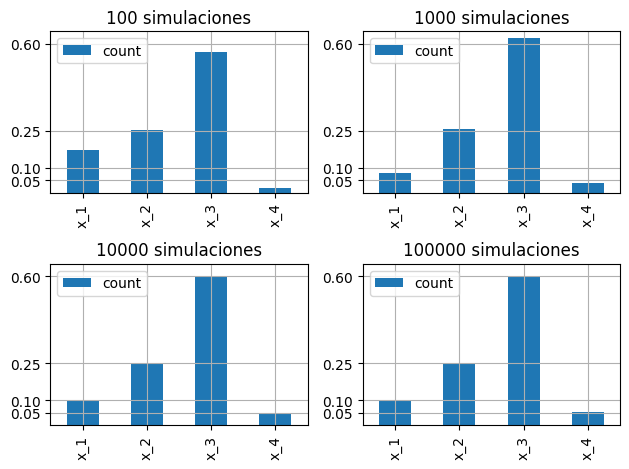

In [45]:
marcas = [0.05,0.10,0.25,0.60]
ylim = [0.0, 0.65]

fig, ax = plt.subplots(2,2)

X_1.plot.bar(ax= ax[0,0], grid= True, yticks=marcas, ylim= ylim)
X_2.plot.bar(ax= ax[0,1], grid= True, yticks=marcas, ylim= ylim)
X_3.plot.bar(ax= ax[1,0], grid= True, yticks=marcas, ylim= ylim)
X_4.plot.bar(ax= ax[1,1], grid= True, yticks=marcas, ylim= ylim)

ax[0,0].set_title("100 simulaciones")
ax[0,1].set_title("1000 simulaciones")
ax[1,0].set_title("10000 simulaciones")
ax[1,1].set_title("100000 simulaciones")

plt.tight_layout()
plt.show()

Podemos observar que nuestro generador cumple su función, y a medida que aumentamos la magnitud del orden de simulaciones, la probabilidad empírica tiende a nuestra probabilidad teórica.

Se adjuntan 2 gráficos que representan la idea detrás del método de la transformada inversa, tanto la VA discretas como continuas:

* <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/FDC-Geometrica.pdf/page1-610px-FDC-Geometrica.pdf.jpg?20201101071844"/>

* <img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Inversion_method2.svg"/> 

<div id='referencias'>

## Referencias

* Ross, S. M. (2019). *Generating Discrete Random Variables*. En *Simulation* (pp. 49-66).